In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.io import loadmat       # Import function to read data.
data = loadmat('EEG-1.mat')
EEGa = data['EEGa']
EEGb = data['EEGb']
t = data['t'][0]
ntrials = EEGa.shape[0]
nsamples = EEGa.shape[1]

In [4]:
mn = EEGa.mean(0)  # Compute the mean across trials (the ERP)

In [5]:
sd = EEGa.std(0)  # Compute the std across trials

In [6]:
sdmn = sd / np.sqrt(ntrials)  # Compute the std of the mean

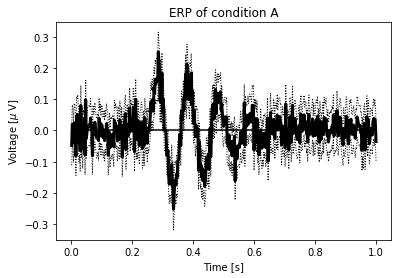

In [7]:
plt.plot(t, mn, 'k', lw=3)              # Plot the ERP of condition A
plt.plot(t, mn + 2 * sdmn, 'k:', lw=1)  # ... and include the upper CI
plt.plot(t, mn - 2 * sdmn, 'k:', lw=1)  # ... and the lower CI
plt.xlabel('Time [s]')                     # Label the axes
plt.ylabel('Voltage [$\mu$ V]')
plt.title('ERP of condition A')            # ... provide a useful title
plt.hlines(0, t[0], t[-1]);

### Confidence Intervals for the ERP (Method 2)

In [8]:
# Example: Draw 1000 integers with replacement from [0, 1000)
i = np.random.randint(0, ntrials, size=ntrials)
print(i)

[843 148 740 401 292 682 386 549 528 743 584 350 502 536 317 659 720 779
 485 256 895 196 324 885 428 355 306 415 509 171 825 507 890 326 667 726
 938 511 615 896 143 447 454 821 566 292  63 416 472 901 183 140 970 806
  85  24 768 703 184 782 183 102 720 740 927 698 810 947 602 524  90 572
 594 530 847 374 681 466 510 787 492 150 958 915 108 115 458  89 111 204
 529  83 977 405 990 887 987 656 831 274 883 364 545 223 364 924 378 974
 272 664 996 597  89 799 466 610   6 661 405  78 559  64 324  21 463 921
 294 435 534 930 589 889 189 645 962 869  90 401 104 562 505 133 731 830
 788 596 180 323 598 702 776 636 134 774  63   8 145  76 867  93 326 273
 662 799 630 490 987 697 987 174 575 876 552 409 719 585 802 266 603 892
  51 427 807 885 116 296 725 519 343  42 726 431 258 292 423 922 288 360
 669 705 388 541 964  92 321 332 687 191 255 269 886 313 877 832 837 334
 420 906 725 828 131 625 791 201 152 641 995 839 699 333 891 806 581 511
 854 616 456 211 655  97 820 425 653 702 102 952 43

In [9]:
EEG0 = EEGa[i,:]        # Create a resampled EEG.
                        # Q: What is the shape of the resampled EEG?

In [10]:
ERP0 = EEG0.mean(0)     # Create the resampled ERP
                        # Q: What is the difference between the resampled EEG and resampled ERP?
                        # Q: What does the resampled ERP look like?

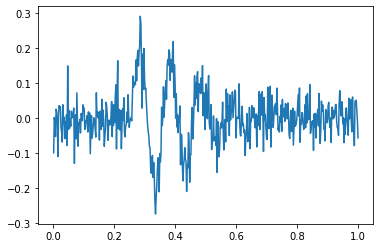

In [11]:
plt.plot(t,ERP0)

In [12]:
#Bootstrap process
N_resample = 3000
ERP0 = np.zeros((N_resample, nsamples))
for k in np.arange(0,N_resample):
    i = np.random.randint(0, ntrials, size=ntrials);  # Create resampled indices.
    EEG0 = EEGa[i,:]                                  # Create a resampled EEG.
    ERP0[k,:] = EEG0.mean(0)                          # Create the resampled ERP

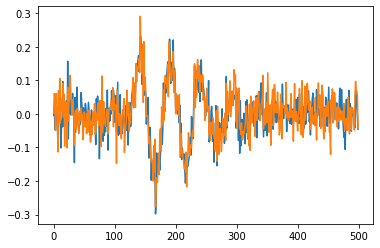

In [13]:
# Plot some examples.
plt.plot(ERP0[0,:]);
plt.plot(ERP0[1,:]);

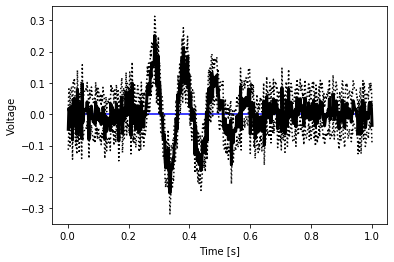

In [14]:
ERP0_sorted = np.sort(ERP0,0)             # Sort each column of the resampled ERP
ciL = ERP0_sorted[int(0.025*N_resample)]  # Determine the lower CI
ciU = ERP0_sorted[int(0.975*N_resample)]  # ... and the upper CI
mnA = EEGa.mean(0)                        # Determine the ERP for condition A
plt.plot(t, mnA, 'k', lw=3)                   # ... and plot it
plt.plot(t, ciL, 'k:')                        # ... and plot the lower CI
plt.plot(t, ciU, 'k:')                        # ... and the upper CI
plt.hlines(0, 0, 1, 'b')                      # plot a horizontal line at 0
plt.xlabel('Time [s]')                    # ... and label the axes
plt.ylabel('Voltage');

### Comparing ERPs <a class="anchor" id="comparing-erps"></a>

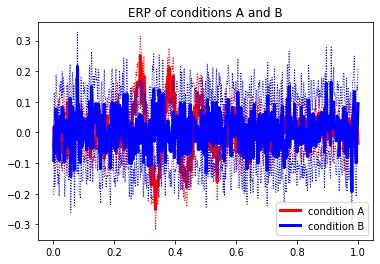

In [15]:
erpA = EEGa.mean(0)         # Compute the mean across trials (the ERP)
sdA  = EEGa.std(0)          # Compute the sd across trials 
sdmnA= sdA / np.sqrt(ntrials)  # Compute the s.d.m.n

erpB = EEGb.mean(0)         # Compute the mean across trials (the ERP)
sdB  = EEGb.std(0)          # Compute the sd across trials 
sdmnB= sdB / np.sqrt(ntrials)  # Compute the s.d.m.n

plt.plot(t, erpA, 'r', lw=3, label='condition A')  # Plot the ERP of condition A
plt.plot(t, erpA + 2 * sdmnA, 'r:', lw=1)           # ... and include the upper CI
plt.plot(t, erpA - 2 * sdmnA, 'r:', lw=1)           # ... and the lower CI

plt.plot(t, erpB, 'b', lw=3, label='condition B')  # Plot the ERP of condition B
plt.plot(t, erpB + 2 * sdmnB, 'b:', lw=1)           # ... and include the upper CI
plt.plot(t, erpB - 2 * sdmnB, 'b:', lw=1)           # ... and the lower CI

plt.title('ERP of conditions A and B')
plt.legend()

### A Bootstrap Test to Compare ERPs <a id="bootstrap"></a>

In [16]:
mnA = np.mean(EEGa,0)          # Determine ERP for condition A
mnB = np.mean(EEGb,0)          # Determine ERP for condition B
mnD = mnA - mnB                # Compute the differenced ERP
stat = np.max(np.abs(mnD))     # Compute the statistic
print('stat = {:.4f}'.format(stat))

stat = 0.2884


In [18]:
EEG = np.vstack((EEGa, EEGb))  # Step 1. Merge EEG data from all trials
np.random.seed(123)            # Fix seed for reproducibility

N_resample = 3000;
stat0 = np.zeros(N_resample)
for k in np.arange(0,N_resample):
    
    i = np.random.randint(0, 2*ntrials, size=ntrials);    # Create resampled indices.
    EEG0 = EEG[i,:]                                       # Create a resampled EEG.
    ERP0_A = EEG0.mean(0)                                 # Create a resampled ERP.
    
    i = np.random.randint(0, 2*ntrials, size=ntrials);    # Create resampled indices.
    EEG0 = EEG[i,:]                                       # Create a resampled EEG.
    ERP0_B = EEG0.mean(0)                                 # Create a resampled ERP.
    
    stat0[k] = np.max(np.abs(ERP0_A - ERP0_B))

0.006

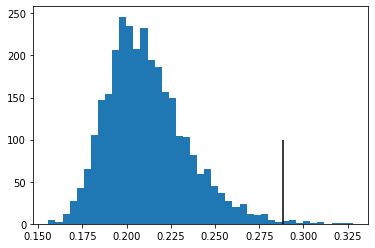

In [19]:
plt.figure()
plt.hist(stat0, bins='auto')
plt.vlines(stat, 0, 100)
np.size(np.where(stat0>stat)) / stat0.size